In [139]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# additional libraries for profiling, (also need to install sweetviz, ipywidgets, setuptools in the virtual environment)
import sweetviz as sv
import datetime

Dataset: Airplane Price Prediction

This dataset contains 12,377 rows and is designed for machine learning models to predict airplane prices. The data simulates real-world factors affecting airplane costs, making it ideal for regression tasks, exploratory data analysis, and model training. Below is an explanation of the dataset's structure and columns:

Columns:

- Model: The airplane model (e.g., Boeing 737, Airbus A320). Represents a key feature influencing price based on brand and performance capabilities.
- Üretim Yılı (Production Year): The year the airplane was manufactured. It helps calculate the airplane's age, a significant factor in depreciation.
- Motor Sayısı (Number of Engines): The total number of engines on the airplane (1 for piston engines, 2 for others).
- Motor Türü (Engine Type): Type of engine, such as Turbofan or Piston. Different engine types affect performance, fuel efficiency, and price.
- Kapasite (Capacity): Passenger capacity of the airplane. Larger airplanes with higher capacity tend to have higher base prices.
- Menzil (km) (Range in km): Maximum range the airplane can travel without refueling. Greater range increases operational flexibility and cost.
- Yakıt Tüketimi (L/saat) (Fuel Consumption in L/hour): Average fuel consumption of the airplane. Turbofan engines consume less than piston engines, influencing operating costs.
- Saatlik Bakım Maliyeti ($) (Hourly Maintenance Cost): The average hourly maintenance cost in USD. Higher maintenance costs can lower demand and impact pricing.
- Yaş (Age): The age of the airplane, calculated as 2023 - Production Year. Older airplanes tend to have lower prices due to depreciation.
- Satış Bölgesi (Sales Region): The region where the airplane is being sold (e.g., Asia, Europe, North America). Regional demand and currency variations can affect prices.
- Fiyat ($) (Price in USD): The final price of the airplane, serving as the target variable for prediction.

Key Features

Realism: Prices are dynamically calculated based on multiple factors, including age, capacity, range, and a noise factor to simulate real-world variability.
Diversity: Covers different airplane models, engine types, and regions to provide a rich dataset for diverse analytical needs.

Applications: Ideal for regression modeling, feature engineering, and price analysis in the aviation industry.
This dataset offers a practical foundation for exploring factors influencing airplane prices and building predictive models.

In [140]:
# Run profiling and load dataset 
# sweetviz
import sweetviz as sv


if not hasattr(np, 'VisibleDeprecationWarning'):
    np.VisibleDeprecationWarning = DeprecationWarning

airplane_price_sv_df = pd.read_csv('data/airplane_price_dataset.csv',delimiter=',', encoding='utf-8')

from datetime import datetime

report =sv.analyze(airplane_price_sv_df)
report.show_html('Airplane_price_dataset_sweetviz.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Airplane_price_dataset_sweetviz.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Findings from Sweetviz


In [141]:
# Load and copy the data before cleaning

airplane_df = pd.read_csv('data/airplane_price_dataset.csv',delimiter=',', encoding='utf-8')
airplane_price_df = airplane_df.copy()

# Check for colums and dtypes
airplane_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12377 entries, 0 to 12376
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Model                       12377 non-null  object 
 1   Üretim Yılı                 12377 non-null  int64  
 2   Motor Sayısı                12377 non-null  int64  
 3   Motor Türü                  12377 non-null  object 
 4   Kapasite                    12377 non-null  int64  
 5   Menzil (km)                 12377 non-null  int64  
 6   Yakıt Tüketimi (L/saat)     12377 non-null  float64
 7   Saatlik Bakım Maliyeti ($)  12377 non-null  float64
 8   Yaş                         12377 non-null  int64  
 9   Satış Bölgesi               12377 non-null  object 
 10  Fiyat ($)                   12377 non-null  float64
dtypes: float64(3), int64(5), object(3)
memory usage: 1.0+ MB


In [142]:
airplane_df.head()

,Model,Üretim Yılı,Motor Sayısı,Motor Türü,Kapasite,Menzil (km),Yakıt Tüketimi (L/saat),Saatlik Bakım Maliyeti ($),Yaş,Satış Bölgesi,Fiyat ($)
0,Bombardier CRJ200,1987,2,Turbofan,50,3000,14.36,2185.43,36,Asya,1.285708e+07
1,Bombardier CRJ200,1997,2,Turbofan,50,3000,4.03,1202.08,26,Avrupa,1.391406e+07
2,Airbus A320,1988,2,Turbofan,180,6300,13.26,761.38,35,Avustralya,9.073570e+07
3,Boeing 737,2023,2,Turbofan,162,5700,14.61,592.63,0,Avustralya,1.366597e+08
4,Cessna 172,1985,1,Piston,4,1285,18.49,4245.99,38,Güney Amerika,2.037981e+05


In [143]:
# Rename columns
airplane_df.columns = ['Airplane Model', 'Production Year', 'Number of Engines', 'Engine_Type', 'Passenger Capacity', 'Range in km', 
              'Fuel Consumption L/hour', 'Hourly Maintenance Cost in $', 'Airplane Age','Sales Region', 'Price in $']

airplane_df.head()


,Airplane Model,Production Year,Number of Engines,Engine_Type,Passenger Capacity,Range in km,Fuel Consumption L/hour,Hourly Maintenance Cost in $,Airplane Age,Sales Region,Price in $
0,Bombardier CRJ200,1987,2,Turbofan,50,3000,14.36,2185.43,36,Asya,1.285708e+07
1,Bombardier CRJ200,1997,2,Turbofan,50,3000,4.03,1202.08,26,Avrupa,1.391406e+07
2,Airbus A320,1988,2,Turbofan,180,6300,13.26,761.38,35,Avustralya,9.073570e+07
3,Boeing 737,2023,2,Turbofan,162,5700,14.61,592.63,0,Avustralya,1.366597e+08
4,Cessna 172,1985,1,Piston,4,1285,18.49,4245.99,38,Güney Amerika,2.037981e+05


In [144]:
# The Production Year column can be dropped as the Airplane age is available.
plane_df = airplane_df.drop('Production Year', axis=1)

# The number of engines can be dropped as there is a correlation with the engine type
plane_df = plane_df.drop('Number of Engines', axis=1)

# The Price in $ can be represented as an integer
plane_df['Price in $'] = plane_df['Price in $'].astype(int)

plane_df.head()


,Airplane Model,Engine_Type,Passenger Capacity,Range in km,Fuel Consumption L/hour,Hourly Maintenance Cost in $,Airplane Age,Sales Region,Price in $
0,Bombardier CRJ200,Turbofan,50,3000,14.36,2185.43,36,Asya,12857083
1,Bombardier CRJ200,Turbofan,50,3000,4.03,1202.08,26,Avrupa,13914058
2,Airbus A320,Turbofan,180,6300,13.26,761.38,35,Avustralya,90735695
3,Boeing 737,Turbofan,162,5700,14.61,592.63,0,Avustralya,136659689
4,Cessna 172,Piston,4,1285,18.49,4245.99,38,Güney Amerika,203798


In [145]:
plane_df.isnull().sum()

Airplane Model                  0
Engine_Type                     0
Passenger Capacity              0
Range in km                     0
Fuel Consumption L/hour         0
Hourly Maintenance Cost in $    0
Airplane Age                    0
Sales Region                    0
Price in $                      0
dtype: int64

In [146]:
print(plane_df['Airplane Model'].value_counts())

print(plane_df['Sales Region'].value_counts())

Airplane Model
Boeing 737           2121
Airbus A350          2107
Bombardier CRJ200    2051
Airbus A320          2048
Cessna 172           2039
Boeing 777           2011
Name: count, dtype: int64
Sales Region
Afrika           2171
Avustralya       2071
Avrupa           2062
Güney Amerika    2053
Asya             2017
Kuzey Amerika    2003
Name: count, dtype: int64


In [147]:
# The regions in the Sales_Region must be translated.
plane_df['Sales Region'] = plane_df['Sales Region'].replace({'Avrupa': 'Europe', 'Kuzey Amerika': 'North America', 'Asya': 'Asia', 'Güney Amerika': 'South America', 'Afrika': 'Africa', 'Avustralya': 'Australia'})

print(plane_df['Sales Region'].value_counts())

Sales Region
Africa           2171
Australia        2071
Europe           2062
South America    2053
Asia             2017
North America    2003
Name: count, dtype: int64


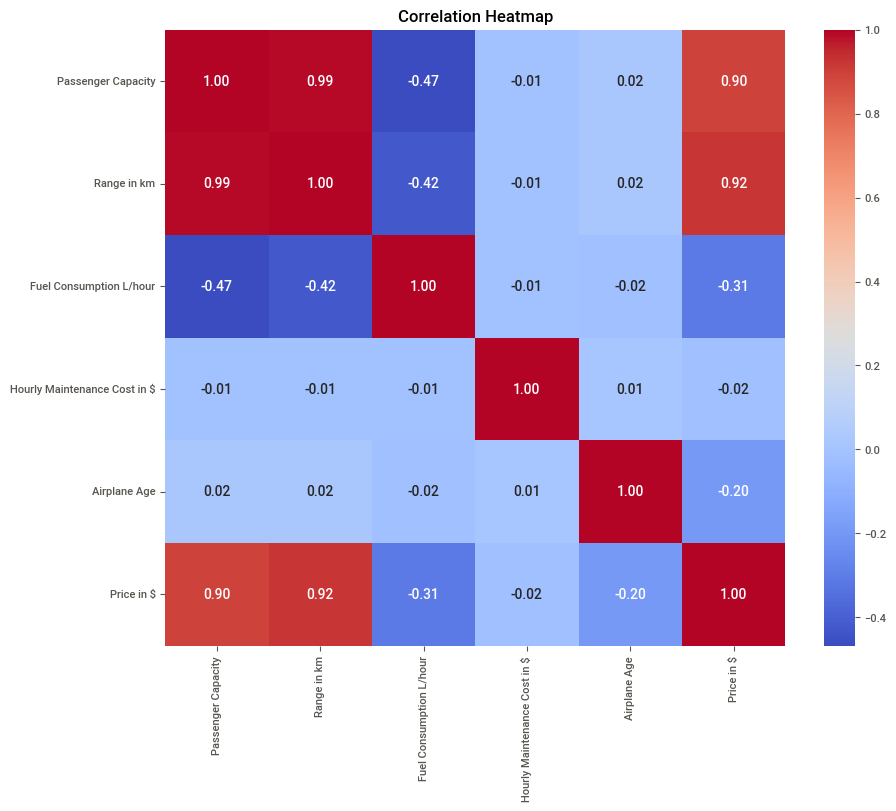

In [148]:
# Correlation heatmap matrix
numeric_df = plane_df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [149]:
# Check variance of the numerical columns
num_variance = numeric_df.var()
num_variance = num_variance.drop('Price in $')
print(num_variance)


Passenger Capacity              2.035265e+04
Range in km                     3.016732e+07
Fuel Consumption L/hour         9.811731e+01
Hourly Maintenance Cost in $    1.672391e+06
Airplane Age                    1.629908e+02
dtype: float64


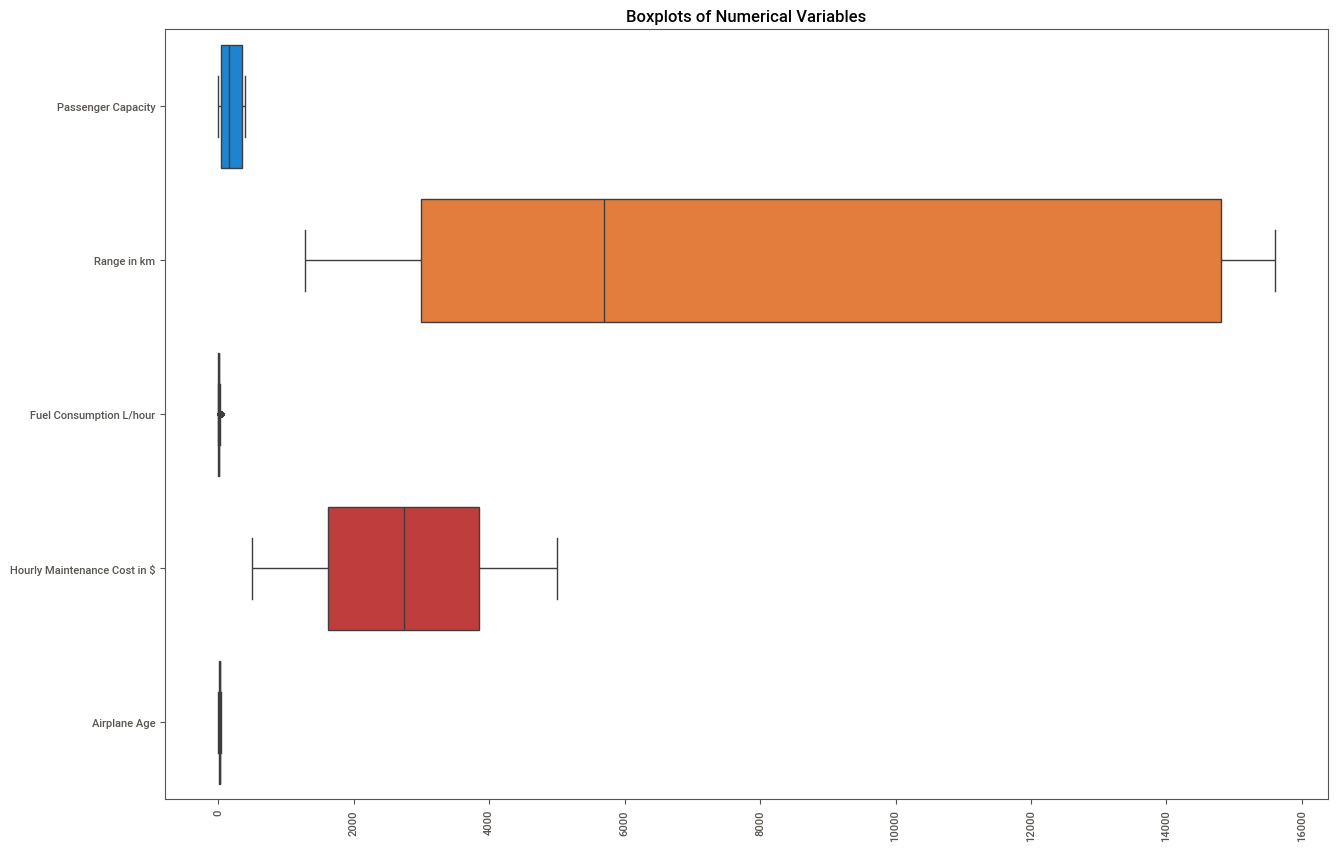

In [150]:
# Create a boxplot for each numerical variable to show the variance in the predictors.
numeric_df_box = numeric_df.drop('Price in $', axis=1)
plt.figure(figsize=(15, 10))
sns.boxplot(data=numeric_df_box, orient='h')
plt.xticks(rotation=90)
plt.title('Boxplots of Numerical Variables')
plt.show()

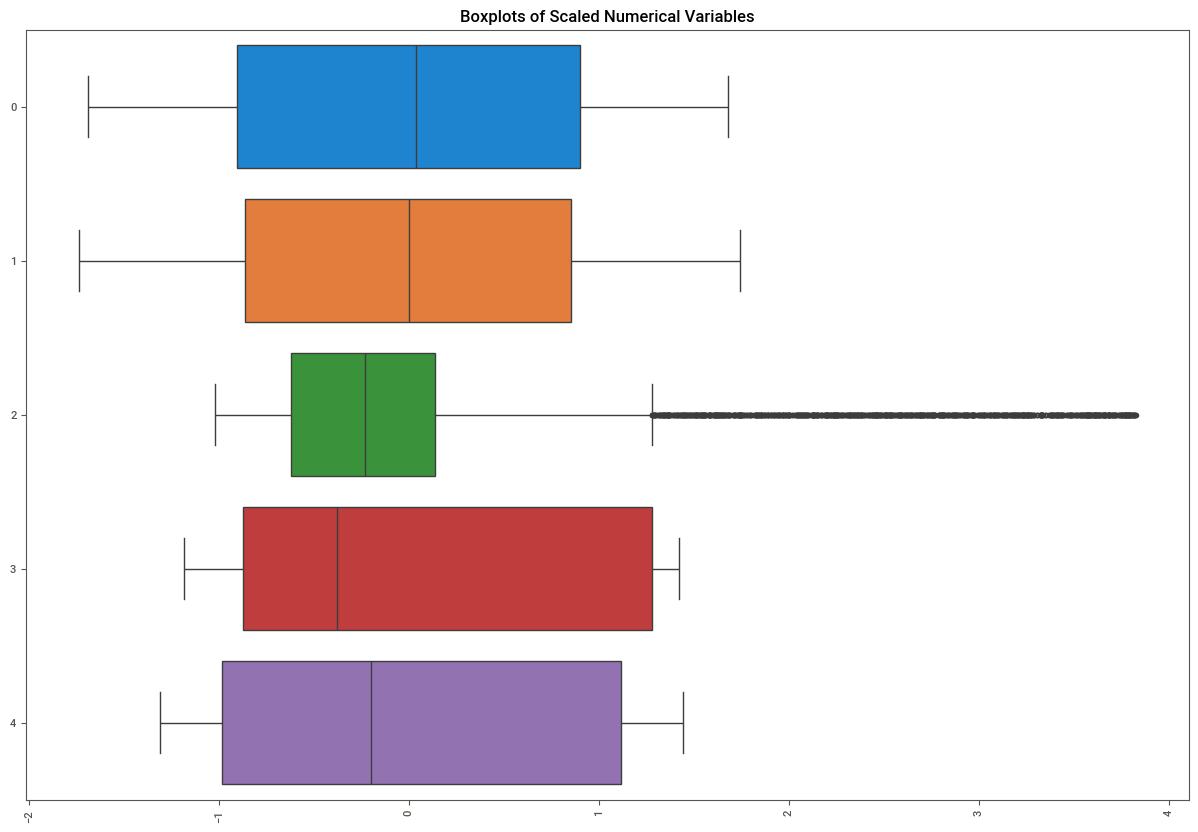

In [151]:
from sklearn.preprocessing import StandardScaler


# Create the scaler
scaler = StandardScaler()

# Take a subset of the DataFrame you want to scale
numeric_subset = numeric_df_box[['Airplane Age', 'Hourly Maintenance Cost in $','Fuel Consumption L/hour', 'Range in km', 'Passenger Capacity']]    

# Apply the scaler to the DataFrame subset
numeric_subset_scaled = scaler.fit_transform(numeric_subset)

plt.figure(figsize=(15, 10))
sns.boxplot(data=numeric_subset_scaled, orient='h')
plt.xticks(rotation=90)
plt.title('Boxplots of Scaled Numerical Variables')
plt.show()





In [152]:
# Create X and y arrays
X = numeric_df_box.values
y = numeric_df["Price in $"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X_train, y_train)

# Make predictions
y_pred = reg.predict(X_test)
print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))

Predictions: [ 55328616.32990821 -53653123.3448192 ], Actual Values: [  444327 13325868]


In [153]:
# Import mean_squared_error
from sklearn.metrics import root_mean_squared_error

# Compute R-squared
r_squared = reg.score(X_test, y_test)

# Compute RMSE
rmse = root_mean_squared_error(y_test, y_pred)

# Print the metrics
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))

R^2: 0.9098832405241891
RMSE: 69404987.45031938


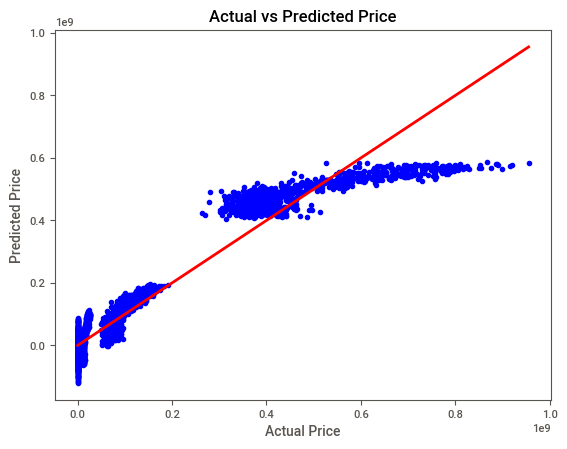

In [154]:
# Visualize y_test vs y_pred
plt.scatter(y_test, y_pred, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.show()

IMPORTANT NOTE:

The prediction of airplane cost is clearly represented through 3 different clusters.
The clusters correspond to the different airplane models. A Linear Regression model for this dataset is not the most appropriate, due to the large cost difference between a small airplane (Type Cesna) and a large airplane (Type Boeing 777).
Therefor further visuals represents ML prediction model for specific small / medium / large size of airplanes.

In [157]:
# Specific for small planes
small_plane_df = plane_df[plane_df['Passenger Capacity'] < 50]

X = small_plane_df[['Airplane Age', 'Hourly Maintenance Cost in $','Fuel Consumption L/hour', 'Range in km', 'Passenger Capacity']].values
y = small_plane_df['Price in $'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))


Predictions: [263733.21119075 283570.80921677], Actual Values: [202069 260827]


In [158]:
# Compute R-squared for small planes
r_squared = reg.score(X_test, y_test)

# Compute RMSE for small planes
rmse = root_mean_squared_error(y_test, y_pred)

# Print the metrics for small planes
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))

R^2: 0.769074744511426
RMSE: 39086.32954899209


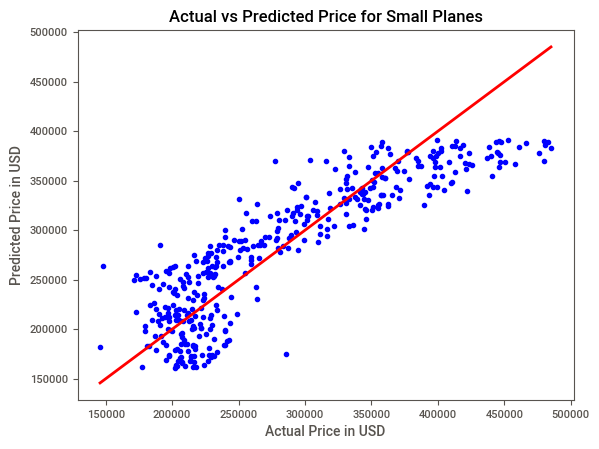

In [159]:
# Visualize y_test vs y_pred for small planes
plt.scatter(y_test, y_pred, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", lw=2)
plt.xlabel("Actual Price in USD")
plt.ylabel("Predicted Price in USD")
plt.title("Actual vs Predicted Price for Small Planes")
plt.show()

In [167]:
# Specific for medium planes
medium_plane_df = plane_df[plane_df['Passenger Capacity'] == 50]

X = medium_plane_df[['Airplane Age', 'Hourly Maintenance Cost in $','Fuel Consumption L/hour', 'Range in km', 'Passenger Capacity']].values
y = medium_plane_df['Price in $'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))

# Compute R-squared for small planes
r_squared = reg.score(X_test, y_test)

# Compute RMSE for small planes
rmse = root_mean_squared_error(y_test, y_pred)

# Print the metrics for small planes
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))

Predictions: [15767639.56740526 19719334.53473324], Actual Values: [14020323 14793712]
R^2: 0.7634547951528982
RMSE: 2160974.6790168635


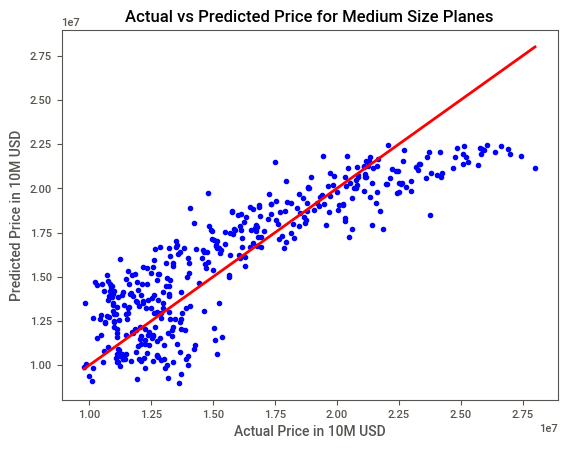

In [168]:
#import matplotlib.ticker as ticker

# Visualize y_test vs y_pred for medium size planes
plt.scatter(y_test, y_pred, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", lw=2)

# Define the formatter function
#def format_func(value, tick_number):
    #return f'{int(value / 1000000)}M'

#plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_func))
#plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_func))

plt.xlabel("Actual Price in 10M USD")
plt.ylabel("Predicted Price in 10M USD")
plt.title("Actual vs Predicted Price for Medium Size Planes")
plt.show()

In [169]:
# Specific for large planes
large_plane_df = plane_df[plane_df['Passenger Capacity'] > 100]

X = large_plane_df[['Airplane Age', 'Hourly Maintenance Cost in $','Fuel Consumption L/hour', 'Range in km', 'Passenger Capacity']].values
y = large_plane_df['Price in $'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))

# Compute R-squared for small planes
r_squared = reg.score(X_test, y_test)

# Compute RMSE for small planes
rmse = root_mean_squared_error(y_test, y_pred)

# Print the metrics for small planes
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))

Predictions: [1.77318511e+08 6.05292875e+08], Actual Values: [110789016 802634860]
R^2: 0.8986127910810079
RMSE: 73591387.30579498


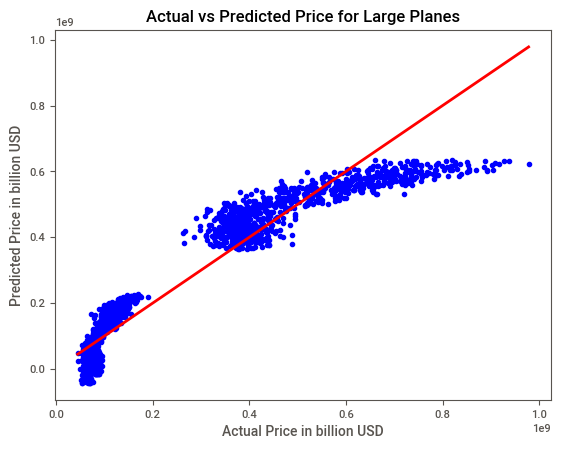

In [170]:
# Visualize y_test vs y_pred for large planes
plt.scatter(y_test, y_pred, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", lw=2)
plt.xlabel("Actual Price in billion USD")
plt.ylabel("Predicted Price in billion USD")
plt.title("Actual vs Predicted Price for Large Planes")
plt.show()